Spam Classification - Naive Bayes

In [ ]:
import kagglehub
# Download dataset
path = kagglehub.dataset_download("somesh24/spambase")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


In [ ]:
# 1. Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Load dataset
df = pd.read_csv('spambase_csv.xls')

In [ ]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
# 3. EDA
# Handle missing values
df = df.dropna(thresh=df.shape[1] * 0.5)
df = df.fillna(df.median(numeric_only=True))

In [ ]:
# Handle outliers using IQR (numeric columns)
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [ ]:
# 4. Separate features and label
label_column = 'class'  # Replace with your actual target column

In [ ]:
# Encode categorical target if necessary
if df[label_column].dtype == 'object':
    le = LabelEncoder()
    df[label_column] = le.fit_transform(df[label_column])

In [ ]:
features = df.drop(label_column, axis=1)
labels = df[label_column]

In [ ]:
# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

In [ ]:
# 5. Feature scaling
scaler = StandardScaler()  # or MinMaxScaler(), Normalizer()
features_scaled = scaler.fit_transform(features)

In [ ]:
# 6. Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## MODEL - GAUSSIAN NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_temp, y_temp, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.88086643 0.86594203 0.87681159 0.82971014 0.86956522]
Mean CV Accuracy: 0.8645790823000052


Accuracy: 0.8813314037626628
Precision: 0.8695652173913043
Recall: 0.8391608391608392
F1 Score: 0.8540925266903915
[[369  36]
 [ 46 240]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       405
         1.0       0.87      0.84      0.85       286

    accuracy                           0.88       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.88      0.88      0.88       691



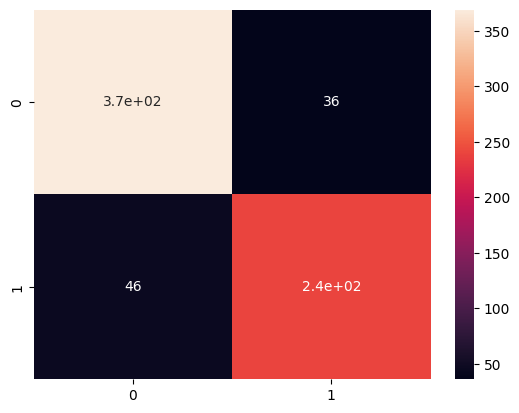

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
gaussian_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gaussian_accuracy)
gaus_precision = precision_score(y_test, y_pred)
print("Precision:", gaus_precision)
gaus_recall = recall_score(y_test, y_pred)
print("Recall:", gaus_recall)
gaus_f1 = f1_score(y_test, y_pred)
print("F1 Score:", gaus_f1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Matthews Correlation Coefficient: 0.7520740606559787
ROC AUC Score: 0.9407925407925408


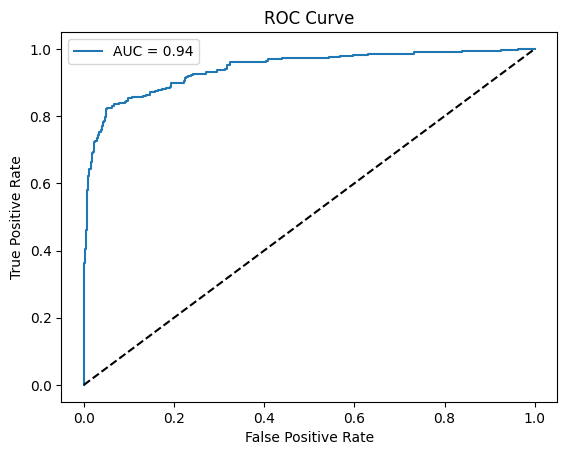

In [ ]:
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))


from sklearn.metrics import roc_auc_score, roc_curve

# For binary classifiers
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model - Multinomial NB

Cross-Validation Accuracy Scores (Multinomial NB): [0.83393502 0.84782609 0.82608696 0.80072464 0.82971014]
Mean CV Accuracy (Multinomial NB): 0.8276565688274996
Accuracy: 0.8654124457308249
Precision: 0.8814229249011858
Recall: 0.7797202797202797
F1 Score: 0.8274582560296846
Confusion Matrix for Multinomial NB:
[[375  30]
 [ 63 223]]

Classification Report for Multinomial NB:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       405
         1.0       0.88      0.78      0.83       286

    accuracy                           0.87       691
   macro avg       0.87      0.85      0.86       691
weighted avg       0.87      0.87      0.86       691



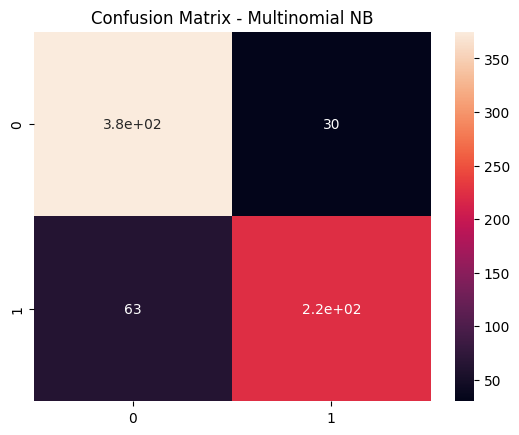


Matthews Correlation Coefficient for Multinomial NB: 0.721440008281765
ROC AUC Score for Multinomial NB: 0.9086765086765087


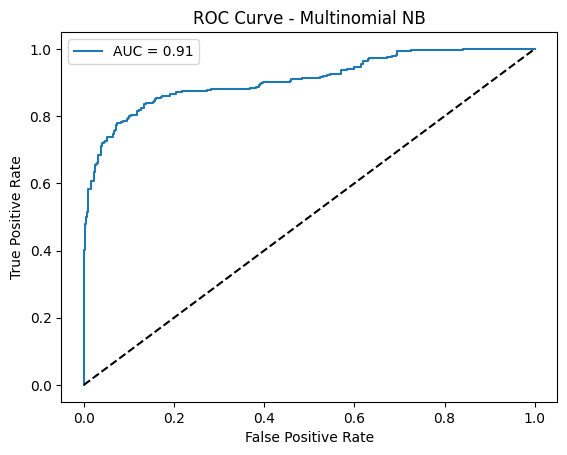

In [ ]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_temp = scalar.transform(X_temp)

# Clip scaled features to be non-negative for MultinomialNB
X_train = np.clip(X_train, 0, None)
X_test = np.clip(X_test, 0, None)
X_temp = np.clip(X_temp, 0, None)


from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

# Cross-validation for Multinomial NB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
cv_mnb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_mnb = cross_val_score(model_mnb, X_temp, y_temp, cv=cv_mnb, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Multinomial NB):", scores_mnb)
print("Mean CV Accuracy (Multinomial NB):", scores_mnb.mean())


# Evaluation for Multinomial NB
y_pred_mnb = model_mnb.predict(X_test)
multinomial_accuracy = accuracy_score(y_test, y_pred_mnb)
print("Accuracy:", multinomial_accuracy)
multinomial_precision = precision_score(y_test, y_pred_mnb)
print("Precision:", multinomial_precision)
multinomial_recall = recall_score(y_test, y_pred_mnb)
print("Recall:", multinomial_recall)
multinomial_f1 = f1_score(y_test, y_pred_mnb)
print("F1 Score:", multinomial_f1)
print("Confusion Matrix for Multinomial NB:")
print(confusion_matrix(y_test, y_pred_mnb))
print("\nClassification Report for Multinomial NB:")
print(classification_report(y_test, y_pred_mnb))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True)
plt.title("Confusion Matrix - Multinomial NB")
plt.show()

# Evaluate with MCC and ROC AUC for Multinomial NB
print("\nMatthews Correlation Coefficient for Multinomial NB:", matthews_corrcoef(y_test, y_pred_mnb))

# For binary classifiers
y_prob_mnb = model_mnb.predict_proba(X_test)[:, 1]
roc_auc_mnb = roc_auc_score(y_test, y_prob_mnb)
print("ROC AUC Score for Multinomial NB:", roc_auc_mnb)

# Plot ROC curve for Multinomial NB
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test, y_prob_mnb)
plt.plot(fpr_mnb, tpr_mnb, label=f'AUC = {roc_auc_mnb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial NB')
plt.legend()
plt.show()

## Model - Bernoulli NB

Cross-Validation Accuracy Scores (Bernoulli NB): [0.85559567 0.86231884 0.86956522 0.83333333 0.82608696]
Mean CV Accuracy (Bernoulli NB): 0.8493800031392246
Accuracy: 0.8118668596237337
Precision: 0.7653061224489796
Recall: 0.7867132867132867
F1 Score: 0.7758620689655172
Confusion Matrix for Bernoulli NB:
[[336  69]
 [ 61 225]]

Classification Report for Bernoulli NB:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       405
         1.0       0.77      0.79      0.78       286

    accuracy                           0.81       691
   macro avg       0.81      0.81      0.81       691
weighted avg       0.81      0.81      0.81       691



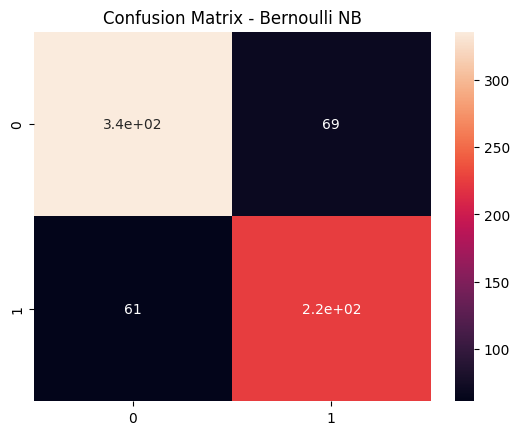


Matthews Correlation Coefficient for Bernoulli NB: 0.6139938464131443
ROC AUC Score for Bernoulli NB: 0.8804843304843304


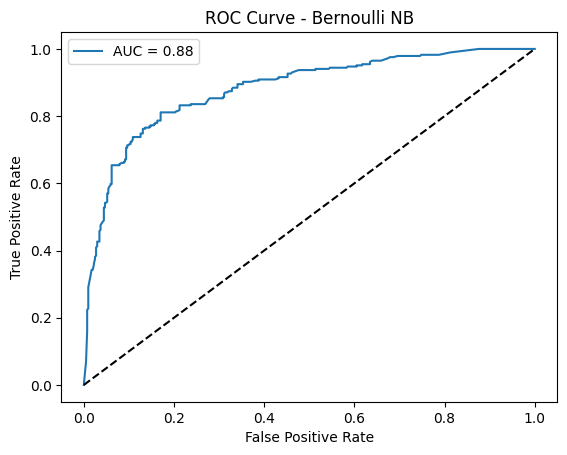

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb.fit(X_train, y_train)

# Cross-validation for Bernoulli NB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
cv_bnb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_bnb = cross_val_score(model_bnb, X_temp, y_temp, cv=cv_bnb, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Bernoulli NB):", scores_bnb)
print("Mean CV Accuracy (Bernoulli NB):", scores_bnb.mean())


# Evaluation for Bernoulli NB
y_pred_bnb = model_bnb.predict(X_test)
bernoulli_accuracy = accuracy_score(y_test, y_pred_bnb)
print("Accuracy:", bernoulli_accuracy)
bernoulli_precision = precision_score(y_test, y_pred_bnb)
print("Precision:", bernoulli_precision)
bernoulli_recall = recall_score(y_test, y_pred_bnb)
print("Recall:", bernoulli_recall)
bernoulli_f1 = f1_score(y_test, y_pred_bnb)
print("F1 Score:", bernoulli_f1)
print("Confusion Matrix for Bernoulli NB:")
print(confusion_matrix(y_test, y_pred_bnb))
print("\nClassification Report for Bernoulli NB:")
print(classification_report(y_test, y_pred_bnb))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True)
plt.title("Confusion Matrix - Bernoulli NB")
plt.show()

# Evaluate with MCC and ROC AUC for Bernoulli NB
print("\nMatthews Correlation Coefficient for Bernoulli NB:", matthews_corrcoef(y_test, y_pred_bnb))

# For binary classifiers
y_prob_bnb = model_bnb.predict_proba(X_test)[:, 1]
roc_auc_bnb = roc_auc_score(y_test, y_prob_bnb)
print("ROC AUC Score for Bernoulli NB:", roc_auc_bnb)

# Plot ROC curve for Bernoulli NB
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_prob_bnb)
plt.plot(fpr_bnb, tpr_bnb, label=f'AUC = {roc_auc_bnb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bernoulli NB')
plt.legend()
plt.show()

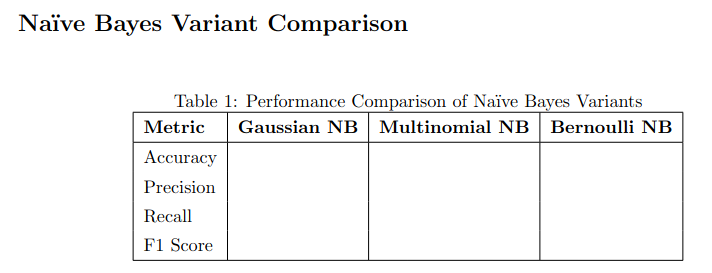

In [ ]:
nb_comparison = {
    "Metrics": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Gaussian NB": [gaussian_accuracy, gaus_precision, gaus_recall, gaus_f1],
    "Multinomial NB": [multinomial_accuracy, multinomial_precision, multinomial_recall, multinomial_f1],
    "Bernoulli NB": [bernoulli_accuracy, bernoulli_precision, bernoulli_recall,bernoulli_f1]
}

nb_comparison_df = pd.DataFrame(nb_comparison)
nb_comparison_df.set_index("Metrics", inplace=True)
nb_comparison_df

,Gaussian NB,Multinomial NB,Bernoulli NB
Metrics,,,
Accuracy,0.881331,0.865412,0.811867
Precision,0.869565,0.881423,0.765306
Recall,0.839161,0.779720,0.786713
F1 Score,0.854093,0.827458,0.775862


## Model - KNN s (vary k, KDTree, BallTree)

Mean Cross-Validation Accuracy for k=1: 0.8458
Test Set Accuracy for k=1: 0.8871
Mean Cross-Validation Accuracy for k=3: 0.8624
Test Set Accuracy for k=3: 0.8944
Mean Cross-Validation Accuracy for k=5: 0.8675
Test Set Accuracy for k=5: 0.8915
Mean Cross-Validation Accuracy for k=7: 0.8624
Test Set Accuracy for k=7: 0.8842


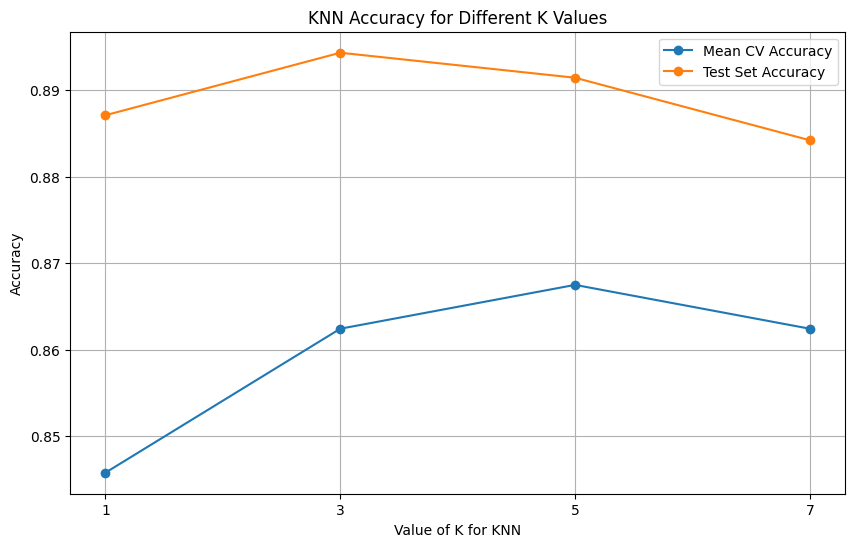

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

# Varying k
k_values = [1, 3, 5, 7]  # Example values for k
mean_accuracy_scores = []
test_accuracy_scores = []


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_value_scores= {
    "k": [1,3,5,7],
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score": []
}

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_knn, X_temp, y_temp, cv=cv, scoring='accuracy')
    mean_accuracy = scores.mean()
    mean_accuracy_scores.append(mean_accuracy)
    print(f"Mean Cross-Validation Accuracy for k={k}: {mean_accuracy:.4f}")

    # Calculate test set accuracy
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_knn)
    test_accuracy_scores.append(test_accuracy)
    k_value_scores["accuracy"].append(mean_accuracy)
    precision = precision_score(y_test, y_pred_knn)
    k_value_scores["precision"].append(precision)
    recall = recall_score(y_test, y_pred_knn)
    k_value_scores["recall"].append(recall)
    f1 = f1_score(y_test, y_pred_knn)
    k_value_scores["f1_score"].append(f1)
    print(f"Test Set Accuracy for k={k}: {test_accuracy:.4f}")


# You can further analyze or visualize the mean_accuracy_scores and test_accuracy_scores to find the best k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy_scores, marker='o', label='Mean CV Accuracy')
plt.plot(k_values, test_accuracy_scores, marker='o', label='Test Set Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

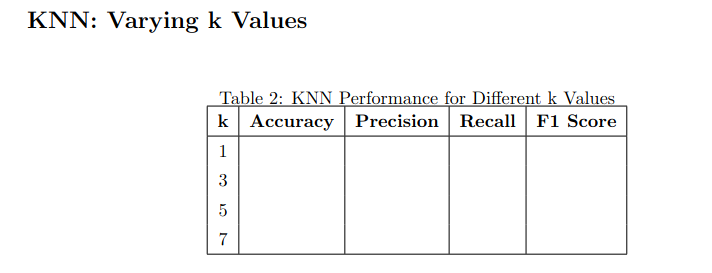

In [ ]:
vary_k = pd.DataFrame(k_value_scores)
vary_k.set_index("k", inplace=True)
vary_k

,accuracy,precision,recall,f1_score
k,,,,
1,0.845754,0.888060,0.832168,0.859206
3,0.862416,0.914397,0.821678,0.865562
5,0.867491,0.920319,0.807692,0.860335
7,0.862416,0.905512,0.804196,0.851852


Cross-Validation Accuracy Scores (KNN - KDTree): [0.86281588 0.89492754 0.86594203 0.83695652 0.87681159]
Mean CV Accuracy (KNN - KDTree): 0.867490713127191

Confusion Matrix for KNN (KDTree):
[[385  20]
 [ 55 231]]

Classification Report for KNN (KDTree):
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       405
         1.0       0.92      0.81      0.86       286

    accuracy                           0.89       691
   macro avg       0.90      0.88      0.89       691
weighted avg       0.89      0.89      0.89       691



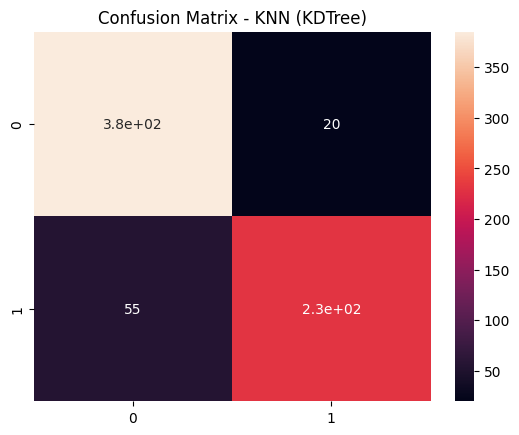


Matthews Correlation Coefficient for KNN (KDTree): 0.7765937275411453
ROC AUC Score for KNN (KDTree): 0.9497539497539498


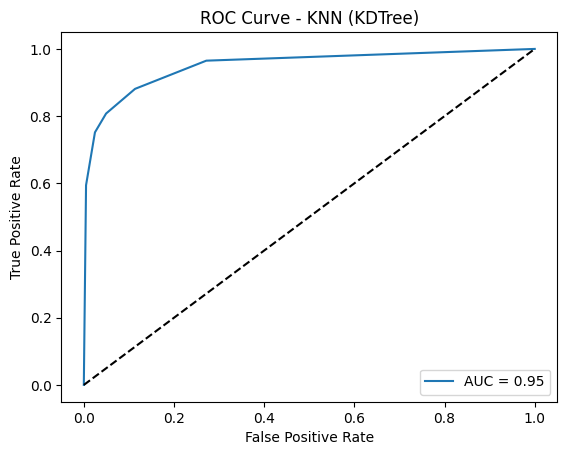

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import time

# KNN with KDTree (using k=5 as an example)
model_knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

# Cross-validation for KNN with KDTree
cv_kdtree = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_kdtree = cross_val_score(model_knn_kdtree, X_temp, y_temp, cv=cv_kdtree, scoring='accuracy')
print("Cross-Validation Accuracy Scores (KNN - KDTree):", scores_kdtree)
print("Mean CV Accuracy (KNN - KDTree):", scores_kdtree.mean())

#calculate training time
start_time = time.time()
model_knn_kdtree.fit(X_train, y_train)
model_knn_kdtree.fit(X_train, y_train)
end_time = time.time()
training_time_kdtree = end_time - start_time
y_pred_knn_kdtree = model_knn_kdtree.predict(X_test)

print("\nConfusion Matrix for KNN (KDTree):")
print(confusion_matrix(y_test, y_pred_knn_kdtree))
print("\nClassification Report for KNN (KDTree):")
print(classification_report(y_test, y_pred_knn_kdtree))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_kdtree), annot=True)
plt.title("Confusion Matrix - KNN (KDTree)")
plt.show()

print("\nMatthews Correlation Coefficient for KNN (KDTree):", matthews_corrcoef(y_test, y_pred_knn_kdtree))

y_prob_knn_kdtree = model_knn_kdtree.predict_proba(X_test)[:, 1]
roc_auc_knn_kdtree = roc_auc_score(y_test, y_prob_knn_kdtree)
print("ROC AUC Score for KNN (KDTree):", roc_auc_knn_kdtree)

fpr_knn_kdtree, tpr_knn_kdtree, thresholds_knn_kdtree = roc_curve(y_test, y_prob_knn_kdtree)
plt.plot(fpr_knn_kdtree, tpr_knn_kdtree, label=f'AUC = {roc_auc_knn_kdtree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (KDTree)')
plt.legend()
plt.show()

Cross-Validation Accuracy Scores (KNN - BallTree): [0.86281588 0.89492754 0.86594203 0.83695652 0.87681159]
Mean CV Accuracy (KNN - BallTree): 0.867490713127191

Confusion Matrix for KNN (BallTree):
[[385  20]
 [ 55 231]]

Classification Report for KNN (BallTree):
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       405
         1.0       0.92      0.81      0.86       286

    accuracy                           0.89       691
   macro avg       0.90      0.88      0.89       691
weighted avg       0.89      0.89      0.89       691



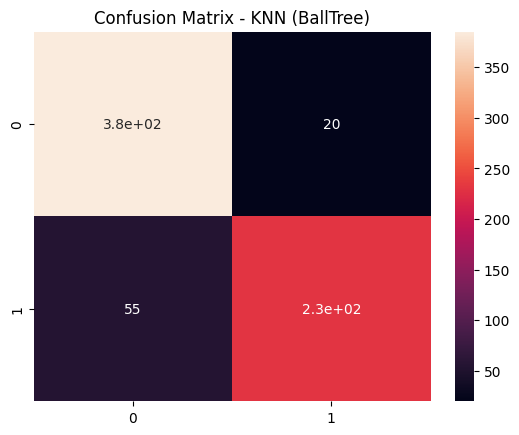


Matthews Correlation Coefficient for KNN (BallTree): 0.7765937275411453
ROC AUC Score for KNN (BallTree): 0.9497539497539498


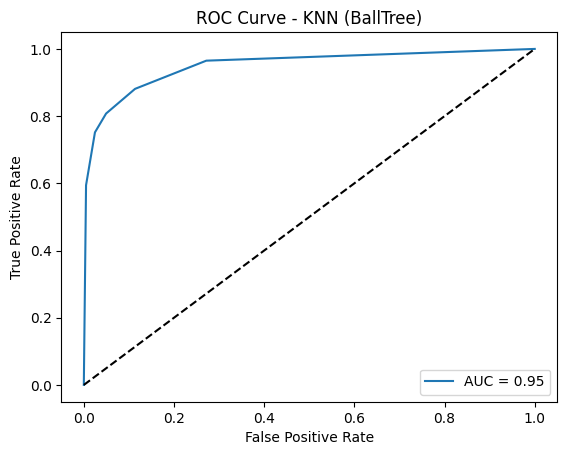

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# KNN with BallTree (using k=5 as an example)
model_knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Cross-validation for KNN with BallTree
cv_balltree = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_balltree = cross_val_score(model_knn_balltree, X_temp, y_temp, cv=cv_balltree, scoring='accuracy')
print("Cross-Validation Accuracy Scores (KNN - BallTree):", scores_balltree)
print("Mean CV Accuracy (KNN - BallTree):", scores_balltree.mean())

import time
start_time = time.time()
model_knn_balltree.fit(X_train, y_train)
end_time = time.time()
training_time_balltree = end_time - start_time
y_pred_knn_balltree = model_knn_balltree.predict(X_test)

print("\nConfusion Matrix for KNN (BallTree):")
print(confusion_matrix(y_test, y_pred_knn_balltree))
print("\nClassification Report for KNN (BallTree):")
print(classification_report(y_test, y_pred_knn_balltree))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_balltree), annot=True)
plt.title("Confusion Matrix - KNN (BallTree)")
plt.show()

print("\nMatthews Correlation Coefficient for KNN (BallTree):", matthews_corrcoef(y_test, y_pred_knn_balltree))

y_prob_knn_balltree = model_knn_balltree.predict_proba(X_test)[:, 1]
roc_auc_knn_balltree = roc_auc_score(y_test, y_prob_knn_balltree)
print("ROC AUC Score for KNN (BallTree):", roc_auc_knn_balltree)

fpr_knn_balltree, tpr_knn_balltree, thresholds_knn_balltree = roc_curve(y_test, y_prob_knn_balltree)
plt.plot(fpr_knn_balltree, tpr_knn_balltree, label=f'AUC = {roc_auc_knn_balltree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (BallTree)')
plt.legend()
plt.show()

In [ ]:
kd_v_ball = {
    "Metric": ["Accuracy","Precision","Recall","F1 Score","Training Time (s)"],
    "KD Tree": [scores_kdtree.mean(), precision_score(y_test, y_pred_knn_kdtree), recall_score(y_test, y_pred_knn_kdtree),f1_score(y_test, y_pred_knn_kdtree),training_time_kdtree],
    "Ball Tree": [scores_balltree.mean(), precision_score(y_test, y_pred_knn_balltree), recall_score(y_test, y_pred_knn_balltree),f1_score(y_test, y_pred_knn_balltree),training_time_balltree]
}

In [ ]:
kd_v_ball_df = pd.DataFrame(kd_v_ball)
kd_v_ball_df.set_index("Metric", inplace=True)
kd_v_ball_df

,KD Tree,Ball Tree
Metric,,
Accuracy,0.867491,0.867491
Precision,0.920319,0.920319
Recall,0.807692,0.807692
F1 Score,0.860335,0.860335
Training Time (s),0.034792,0.011178
